In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

This dataset is on kaggle. And this is my practice on this dataset.
Import data from the csv file, drop the index column.

In [14]:
data = pd.read_csv('avocado.csv', index_col=0)
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


checking missing data, and there is no missing data which is good

In [11]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

{'conventional': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', length=9126), 'organic': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', length=9123)}


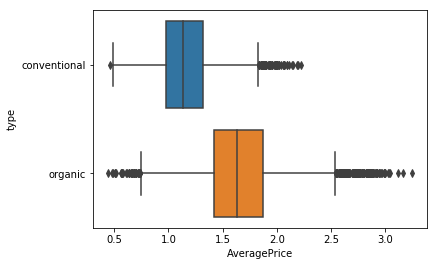

In [38]:
print(data.groupby('type').groups)
types = data.groupby('type').groups
t = ['conventional', 'organic']
sns.boxplot(y = 'type', x = 'AveragePrice', data = data)

There are two types: conventional and organic. And the avarage price of organic ones are higher than conventional ones.

In [18]:
regions = data.groupby(data.region)
for i, j in regions:
    print(i, " : ", len(j))

Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  :  338
Tampa  :  338
TotalUS  :  

There is TotalUS region, we can use it.

/Users/yuchen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


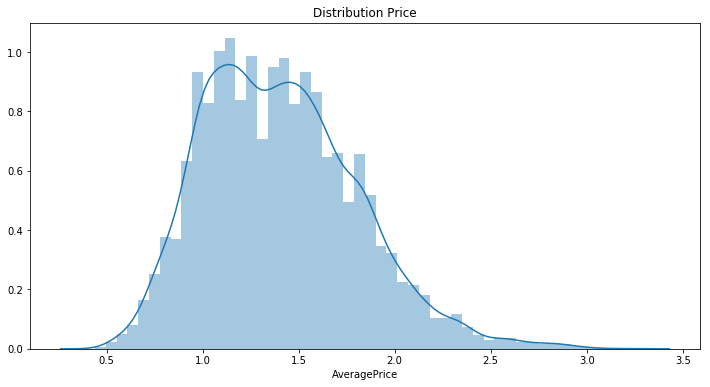

In [7]:
plt.figure(figsize = (12, 6))
plt.title("Distribution Price")
ax = sns.distplot(data["AveragePrice"])

Now we use fbprophet to prefict the price of avocado, since it is a timeseries and fbprophet works will for timeseries

In [23]:
from fbprophet import Prophet

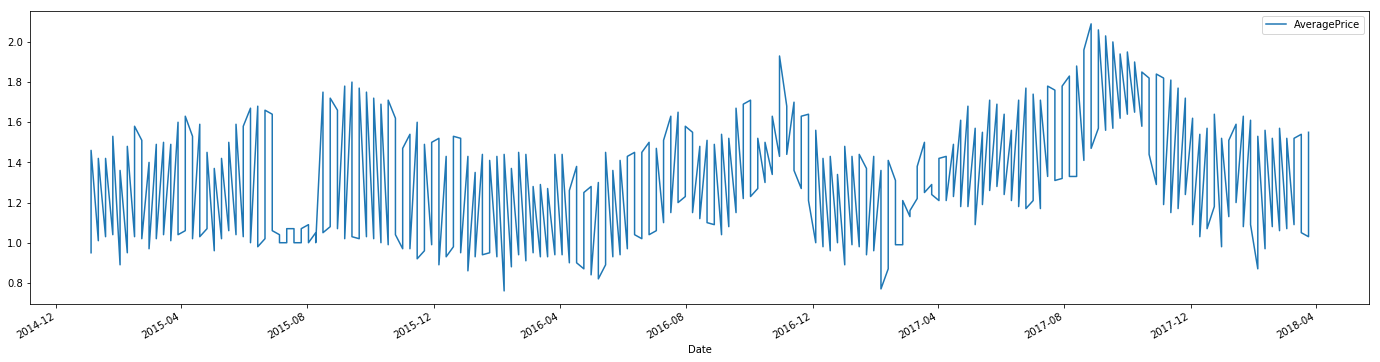

In [32]:
#select from TotalUS
datePrice = regions.get_group('TotalUS')[['Date', 'AveragePrice']].reset_index(drop=True)
datePrice.plot(x = 'Date', y = 'AveragePrice', kind = "line", figsize = (24, 6))

Split the tpye and make models for each type would be more acurrate

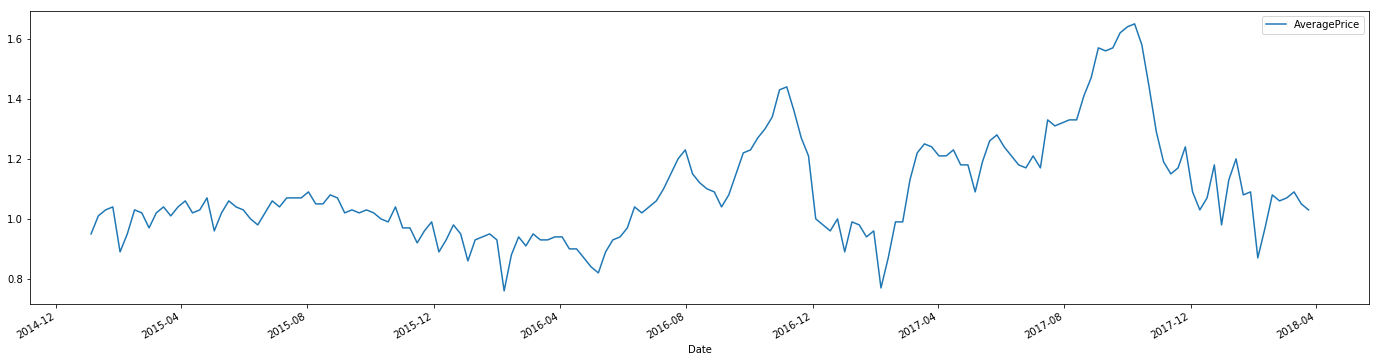

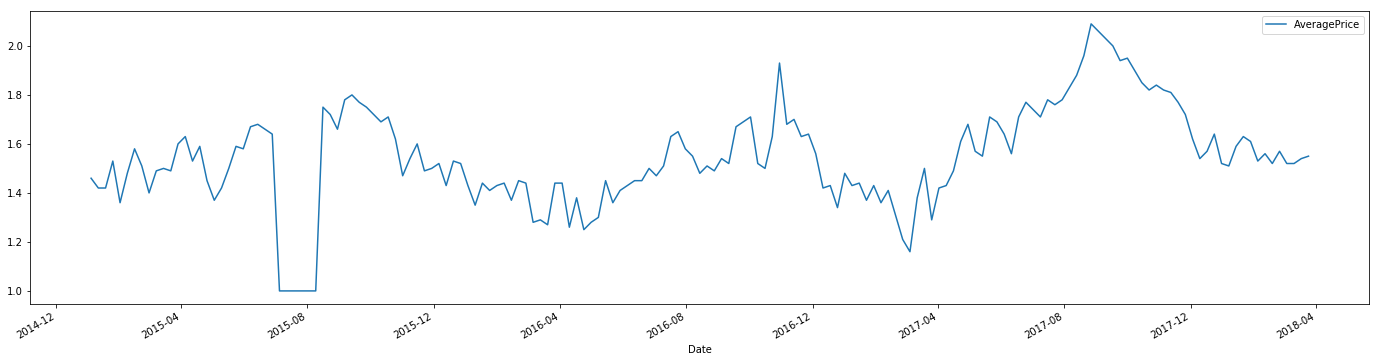

In [47]:
datePriceCon = data.loc[data['type'] == 'conventional']
datePriceOrg = data.loc[data['type'] == 'organic']
regionsCon = datePriceCon.groupby(datePriceCon.region)
regionsOrg = datePriceOrg.groupby(datePriceOrg.region)
datePriceCon = regionsCon.get_group('TotalUS')[['Date', 'AveragePrice']].reset_index(drop=True)
datePriceOrg = regionsOrg.get_group('TotalUS')[['Date', 'AveragePrice']].reset_index(drop=True)
datePriceCon.plot(x = 'Date', y = 'AveragePrice', kind = "line", figsize = (24, 6))
datePriceOrg.plot(x = 'Date', y = 'AveragePrice', kind = "line", figsize = (24, 6))

In [48]:
#rename
datePriceCon = datePriceCon.rename(columns={'Date':'ds', 'AveragePrice':'y'})
datePriceOrg = datePriceOrg.rename(columns={'Date':'ds', 'AveragePrice':'y'})

For conventional ones: 

In [49]:
m = Prophet()
m.fit(datePriceCon)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/yuchen/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [54]:
futureCon = m.make_future_dataframe(periods=365)
forecastCon = m.predict(futureCon)

forecastCon.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.108401,0.888722,1.106763,1.108401,1.108401,-0.116511,-0.116511,-0.116511,-0.116511,-0.116511,-0.116511,0.0,0.0,0.0,0.991889
1,2015-01-11,1.104503,0.895591,1.121037,1.104503,1.104503,-0.095116,-0.095116,-0.095116,-0.095116,-0.095116,-0.095116,0.0,0.0,0.0,1.009387
2,2015-01-18,1.100605,0.894392,1.118995,1.100605,1.100605,-0.095431,-0.095431,-0.095431,-0.095431,-0.095431,-0.095431,0.0,0.0,0.0,1.005174
3,2015-01-25,1.096707,0.852390,1.071475,1.096707,1.096707,-0.131335,-0.131335,-0.131335,-0.131335,-0.131335,-0.131335,0.0,0.0,0.0,0.965372
4,2015-02-01,1.092809,0.802040,1.022933,1.092809,1.092809,-0.184022,-0.184022,-0.184022,-0.184022,-0.184022,-0.184022,0.0,0.0,0.0,0.908787


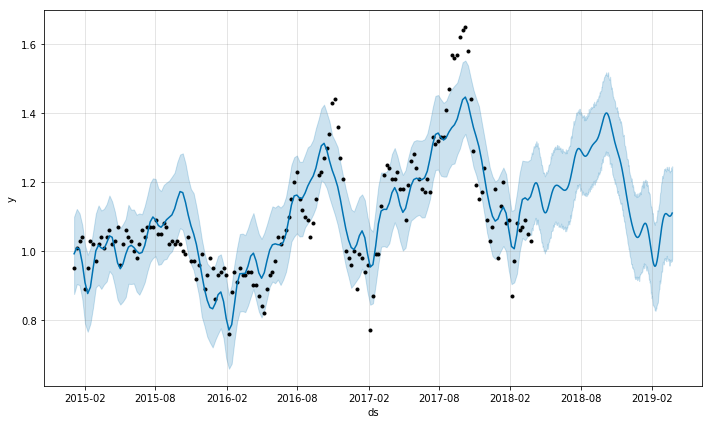

In [52]:
fig1 = m.plot(forecastCon)

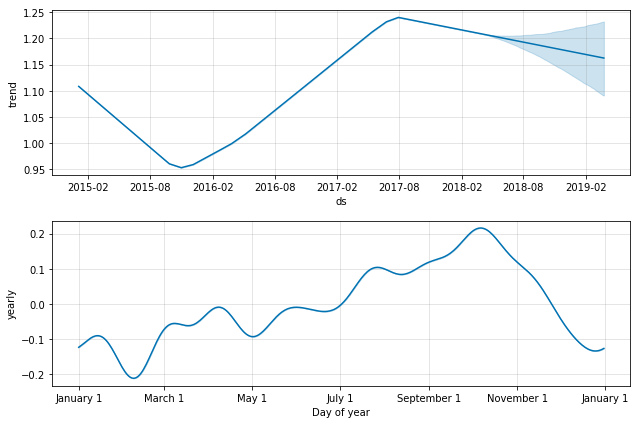

In [55]:
fig2 = m.plot_components(forecastCon)

For organic ones: 

In [56]:
n = Prophet()
n.fit(datePriceOrg)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/yuchen/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [58]:
futureOrg = n.make_future_dataframe(periods=365)
forecastOrg = n.predict(futureOrg)

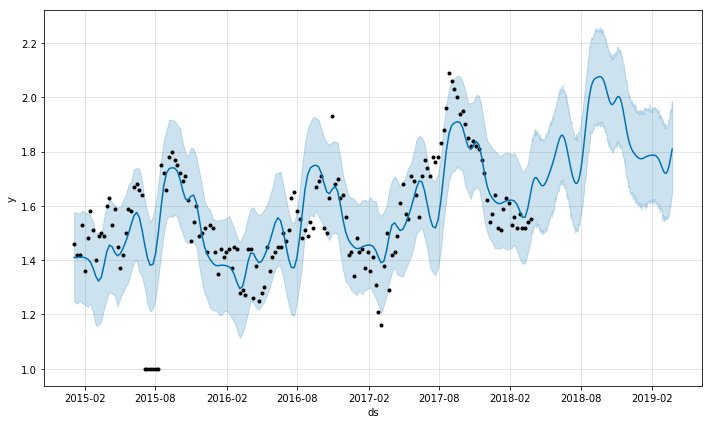

In [60]:
fig3 = n.plot(forecastOrg)

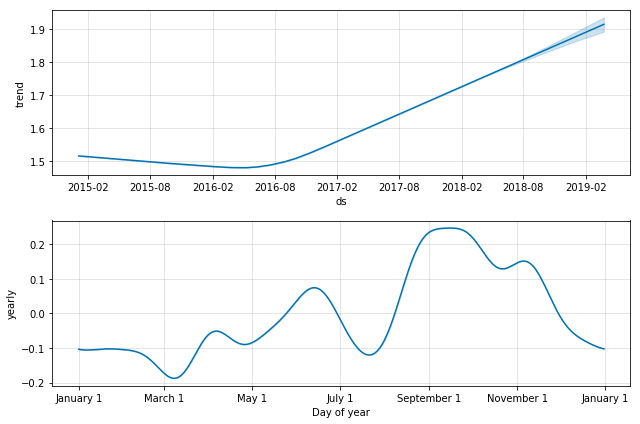

In [61]:
fig4 = n.plot_components(forecastOrg)

According to the graphs, the price of conventional ones are less predictable than organic ones. Organics ones' trend is growing, but conventional ones have the probabilty to drop.